# BL40A2010 Introduction to IoT-Based Systems

## Assignment 3, 31.01.2023

### Author: Liyuan Liu

**(1) Compute the following for a ring topology of $N=5$ and $N=6$  nodes considering that the network in unweighted and the links are directed. The result will give these number as a function of $N$.** ![](./ring.png) *Fig. 1 Example when $N=6$.* 

Answer:
(a)degree of nodes:
Degree of nodes: Each node in a ring topology with N=5 and N=6 nodes has a degree of 2.

(b)Adjacent matrix：
The following adjacency matrix can represent a 5-node ring topology:

0 1 0 0 0

0 0 1 0 0

0 0 0 1 0

0 0 0 0 1

1 0 0 0 0

For a directed ring topology with 6 nodes, the adjacency matrix can be represented as follows:

0 1 0 0 0 0

0 0 1 0 0 0

0 0 0 1 0 0

0 0 0 0 1 0

0 0 0 0 0 1

1 0 0 0 0 0


(c)Diameter：
The diameter of a graph is the length of the longest shortest path between two nodes. In a directed ring topology, the shortest path between any two nodes is the direct path from one node to the other, so the diameter of a N node directed ring topology is D= N-1.
So when N=5 as above graph , d=5; when N=6,d=5;

(d)Clustering coefficient of the nodes：
The clustering coefficient of a node is a measure of the degree to which its neighbors are interconnected. In a directed ring topology, each node is connected to exactly 1 neighbor, so the clustering coefficient of each node is 0.

**(2) Use NetworkX to draw and analyze a ring topology with 5 nodes. Verify if the results previously obtained are valid.**

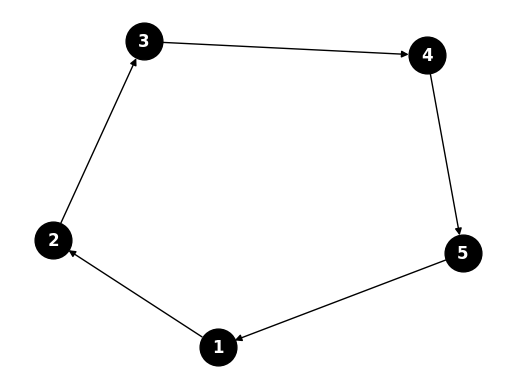

Degree of nodes: [(1, 2), (2, 2), (3, 2), (4, 2), (5, 2)]
Clustering coefficient of nodes: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
Diameter of the network: 4


In [3]:
#Import libraries -->> If an error happens (no library), you need to install the missing libraries (see above)
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import scipy as sp
import numpy as np

G = nx.DiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

# Calculate the properties of the network
print("Degree of nodes:", nx.degree(G))
print("Clustering coefficient of nodes:", nx.clustering(G))
print("Diameter of the network:", nx.diameter(G))

**(3) Analyze the ring topology with size 15 ($N=15$) as a communication network (i.e. how data travel to a point to another in the network) based on the node degree, the network diameter and the cluster coefficient.**

Answer:
Considering undirected and unweighted link between nodes.
Node degree:each node in the ring topology has a degree of 2, meaning it has two connections to other nodes. For example, in a ring with 15 nodes, node 1 is connected to nodes 2 and 15, node 2 is connected to nodes 1 and 3, and so on.
Network diameter: The network diameter is 7, meaning the maximum number of hops needed to travel from one node to another. For example, to travel from node 1 to node 8, data must pass through 7 intermediate nodes (1-2-3-4-5-6-7-8).
Cluster coefficient: The cluster coefficient in a ring topology is low (close to 0) because the nodes are only connected to their immediate neighbors. This means that data must travel through multiple intermediate nodes to reach its destination, making the network less efficient for transmitting information compared to other topologies like a fully connected network. For example, if node 1 wants to send data to node 14, it must pass through 7 intermediate nodes (1-2-3-4-5-6-7-8-9-10-11-12-13-14), which can slow down the transmission of information.

A real-life example of a ring topology communication network is a token ring network in computer networking. In a token ring network, data is transmitted in a circular fashion from one node to another. Each node holds the data for a short period of time before passing it on to the next node. This ensures that each node has a fair chance to transmit data and prevents data collisions, so that data must pass through multiple intermediate nodes to reach its destination. This type of network is commonly used in industrial control systems, where a central control system needs to communicate with several remote devices in a controlled and orderly manner. In this case, the central control system acts as the "talking" node while the remote devices act as "listeners." The ring topology ensures that the data is transmitted in a reliable and controlled manner, making it well-suited for industrial control applications.

Advantages of a ring topology as a communication network:
Reliable data transmission: In a token ring network, data is transmitted in a circular fashion, ensuring that each node has a fair chance to transmit data and preventing data collisions.
Controlled access: Only one node can transmit data at a time, making it easier to control access to the network and prevent data congestion.
Easy to install: Ring topologies are relatively simple to install and maintain, making them a popular choice for small-scale networks.
Disadvantages of a ring topology as a communication network:
Limited scalability: Adding new nodes to the network can be difficult and may require reconfiguring the entire network.
Single point of failure: If one node fails, the entire network can be affected, as data can only be transmitted in a circular fashion.
Slower data transmission: Data must pass through multiple intermediate nodes to reach its destination, making the network slower compared to other topologies like a fully connected network.
Higher cost: Token ring networks can be more expensive to implement compared to other network topologies, due to the need for specialized hardware and software.

Overall, the ring topology can be a good choice for small-scale, controlled networks where reliability and controlled access are important, but may not be the best choice for large-scale networks or networks that require fast data transmission.


**(4) Consider the ring network from the previous question. The network performance depends on its diameter. As a designer, you can add one new node in the network (and an unlimited number of links that this node is part) . Justify your decision and evaluate how much better the network is. Generalize this finding as a function of $N$.**

*Hint:*  Follow Exercise 1 approach to generalize the finding.

Answer:
Considering a N nodes ring topology with undirected links, the diameter d_max=N/2(N is even number), or (N-1)/2 (N is odd number).
Add 1 node,  firstly place the new node at a desired location in the network, for instance, in the center. Then connect the new node to all other nodes in the network with undirected links originating from the new node. The new diameter becomes 2, because in this topology, the central node acts as a hub that connects all other nodes in the network. The shortest path between any two nodes in the network is through the central node, meaning that the network’s diameter equals 2.
By doing this, we increase the number of paths that data can travel through the network and the network’s connectivity. This will result in a more robust network with a higher degree of redundancy, allowing for more efficient data transmission and a higher level of reliability in case of node failures.
Regarding the degree of nodes, the modified mesh topology will be increased from 2(original ring topology) to N-1, where N is the number of nodes in the network. The central node will have the highest degree with N-1 connections, and all other nodes will have a degree of N-2. And regarding the cluster coefficient, the clustering coefficient of nodes in the modified mesh topology will be higher than in the original ring topology. A node's clustering coefficient is a measure of how closely connected its neighbors are, and it is calculated as the ratio of the number of existing connections between a node's neighbors to the maximum number of possible connections between them. In the modified mesh topology, the central node will have the highest clustering coefficient, as all its neighbors will be connected to each other. The other nodes in the network will have a lower clustering coefficient, as only N-2 of their N-1 neighbors will be connected. However, the overall clustering coefficient of the network will be higher than in the original ring topology, as the number of connections in the network has increased, resulting in a more closely connected network.